# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [224]:
demo_ = pd.read_excel(r"demo_.xlsx")
demo_

,Unnamed: 0,Unnamed:_0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single_not_married,estado_civil_Widow,tipo_residencia_Co_op_apartment,tipo_residencia_House_apartment,tipo_residencia_Municipal_apartment,tipo_residencia_Office_apartment,tipo_residencia_Rented_apartment,tipo_residencia_With_parents
0,0,0,0,58.832877,3.106849,1,0,0,0,2,...,1,0,0,0,0,1,0,0,0,0
1,1,1,0,52.356164,8.358904,1,0,1,1,1,...,0,0,1,0,0,1,0,0,0,0
2,2,2,0,52.356164,8.358904,1,0,1,1,1,...,0,0,1,0,0,1,0,0,0,0
3,3,3,0,46.224658,2.106849,1,1,1,1,2,...,1,0,0,0,0,1,0,0,0,0
4,4,4,0,29.230137,3.021918,1,0,0,0,2,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,16645,16645,0,54.109589,9.884932,1,0,0,0,2,...,0,0,0,0,0,1,0,0,0,0
16646,16646,16646,0,43.389041,7.380822,1,1,1,0,2,...,1,0,0,0,0,1,0,0,0,0
16647,16647,16647,0,30.005479,9.800000,1,1,0,0,2,...,1,0,0,0,0,1,0,0,0,0
16648,16648,16648,0,30.005479,9.800000,1,1,0,0,2,...,1,0,0,0,0,1,0,0,0,0


In [225]:
# Apagar colunas que começam com Unnamed
demo_ = demo_.drop(columns=[col for col in demo_.columns if col.startswith("Unnamed")], axis=1)
demo_

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_F,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single_not_married,estado_civil_Widow,tipo_residencia_Co_op_apartment,tipo_residencia_House_apartment,tipo_residencia_Municipal_apartment,tipo_residencia_Office_apartment,tipo_residencia_Rented_apartment,tipo_residencia_With_parents
0,0,58.832877,3.106849,1,0,0,0,2,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1,0,1,...,0,0,1,0,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2,1,1,...,0,0,0,0,0,1,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2,1,1,...,1,0,0,0,0,1,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2,1,0,...,1,0,0,0,0,1,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2,1,0,...,1,0,0,0,0,1,0,0,0,0


In [226]:
y = demo_.mau
y

0        0
1        0
2        0
3        0
4        0
        ..
16645    1
16646    1
16647    1
16648    1
16649    1
Name: mau, Length: 16650, dtype: int64

In [227]:
x = demo_.drop("mau", axis = 1)
x

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_F,sexo_M,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single_not_married,estado_civil_Widow,tipo_residencia_Co_op_apartment,tipo_residencia_House_apartment,tipo_residencia_Municipal_apartment,tipo_residencia_Office_apartment,tipo_residencia_Rented_apartment,tipo_residencia_With_parents
0,0,58.832877,3.106849,1,0,0,0,2,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1,1,0,...,0,0,1,0,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1,1,0,...,0,0,1,0,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2,1,0,...,0,0,0,0,0,1,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2,1,0,...,1,0,0,0,0,1,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2,0,1,...,1,0,0,0,0,1,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2,0,1,...,1,0,0,0,0,1,0,0,0,0


In [228]:
clf = clf.fit(x, y)
clf

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

**Árvore de classificação com todas as variáveis**

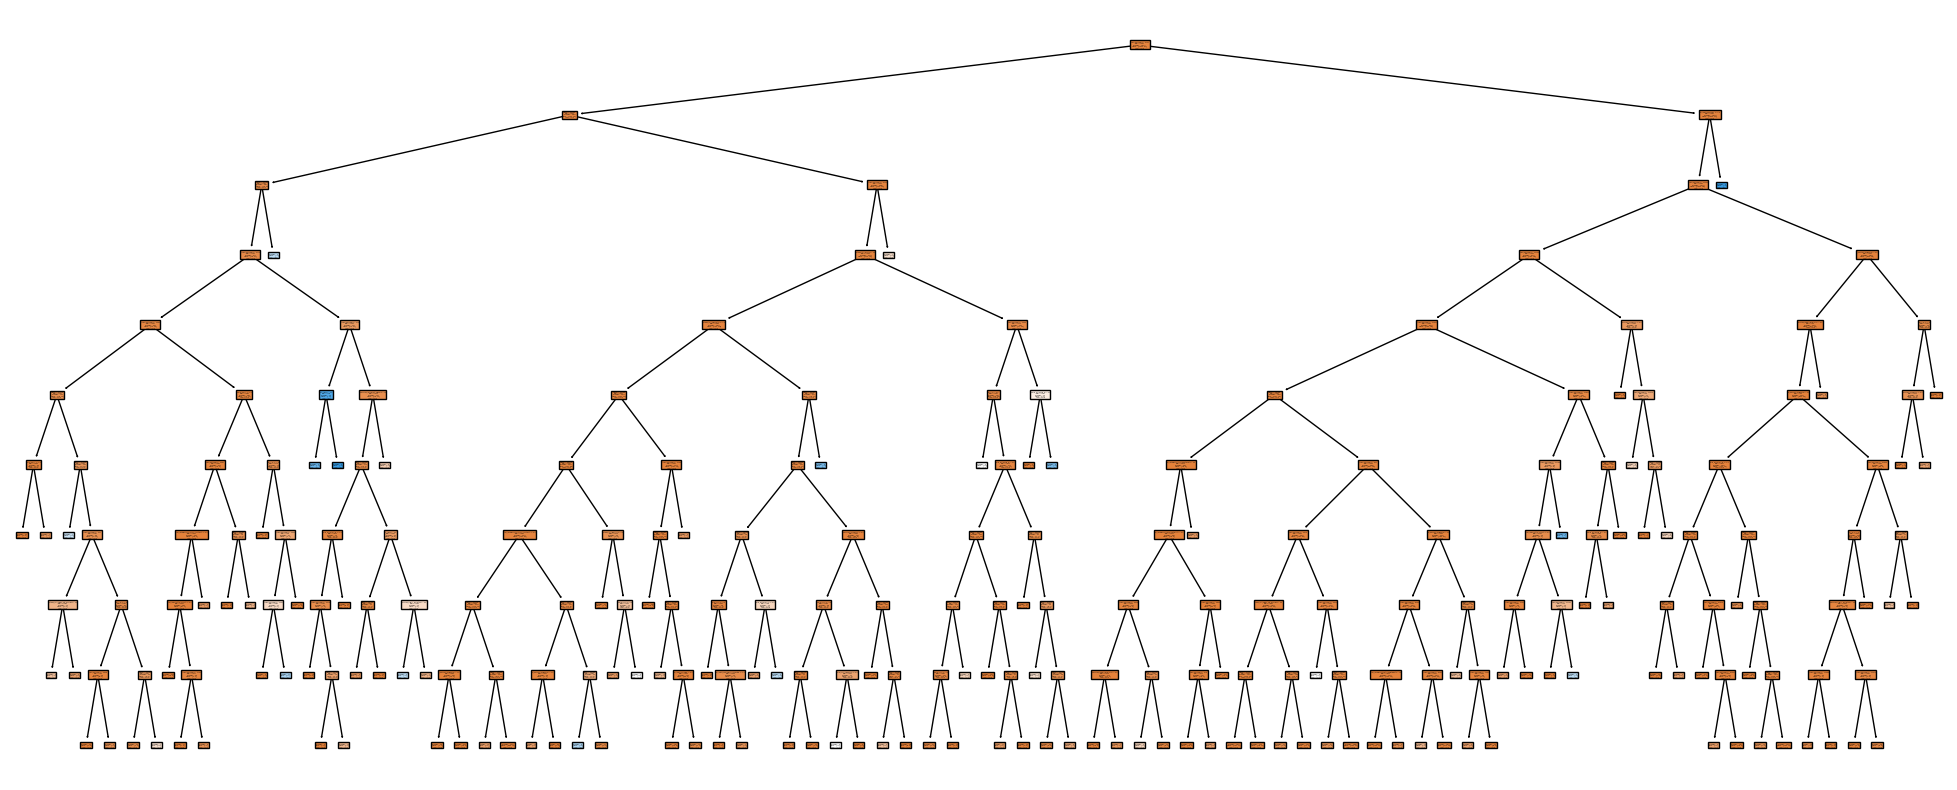

In [229]:
plt.figure(figsize = (25 ,10))
plot_tree(clf,
          filled = True,
          class_names = ['Bom', 'Mau'],
          feature_names = x.columns);

C:\Users\ncali\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


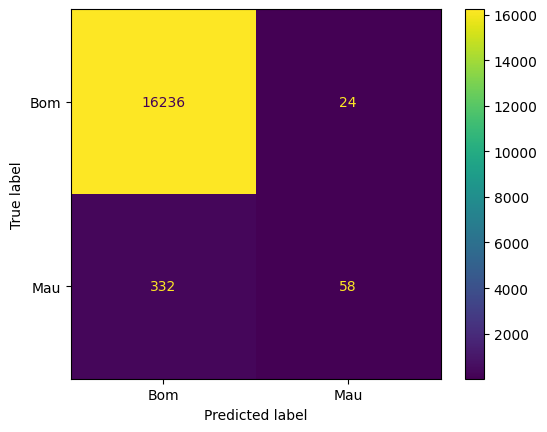

In [230]:
plot_confusion_matrix(clf, x, y, display_labels=['Bom', 'Mau']);

**Acurácia do conjunto de dados**

In [231]:
predict = clf.predict(x)

In [232]:
accuracy_score(y, predict)

0.9786186186186187

In [233]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [234]:
clf = DecisionTreeClassifier(random_state = 100)
clf = clf.fit(x_train, y_train)

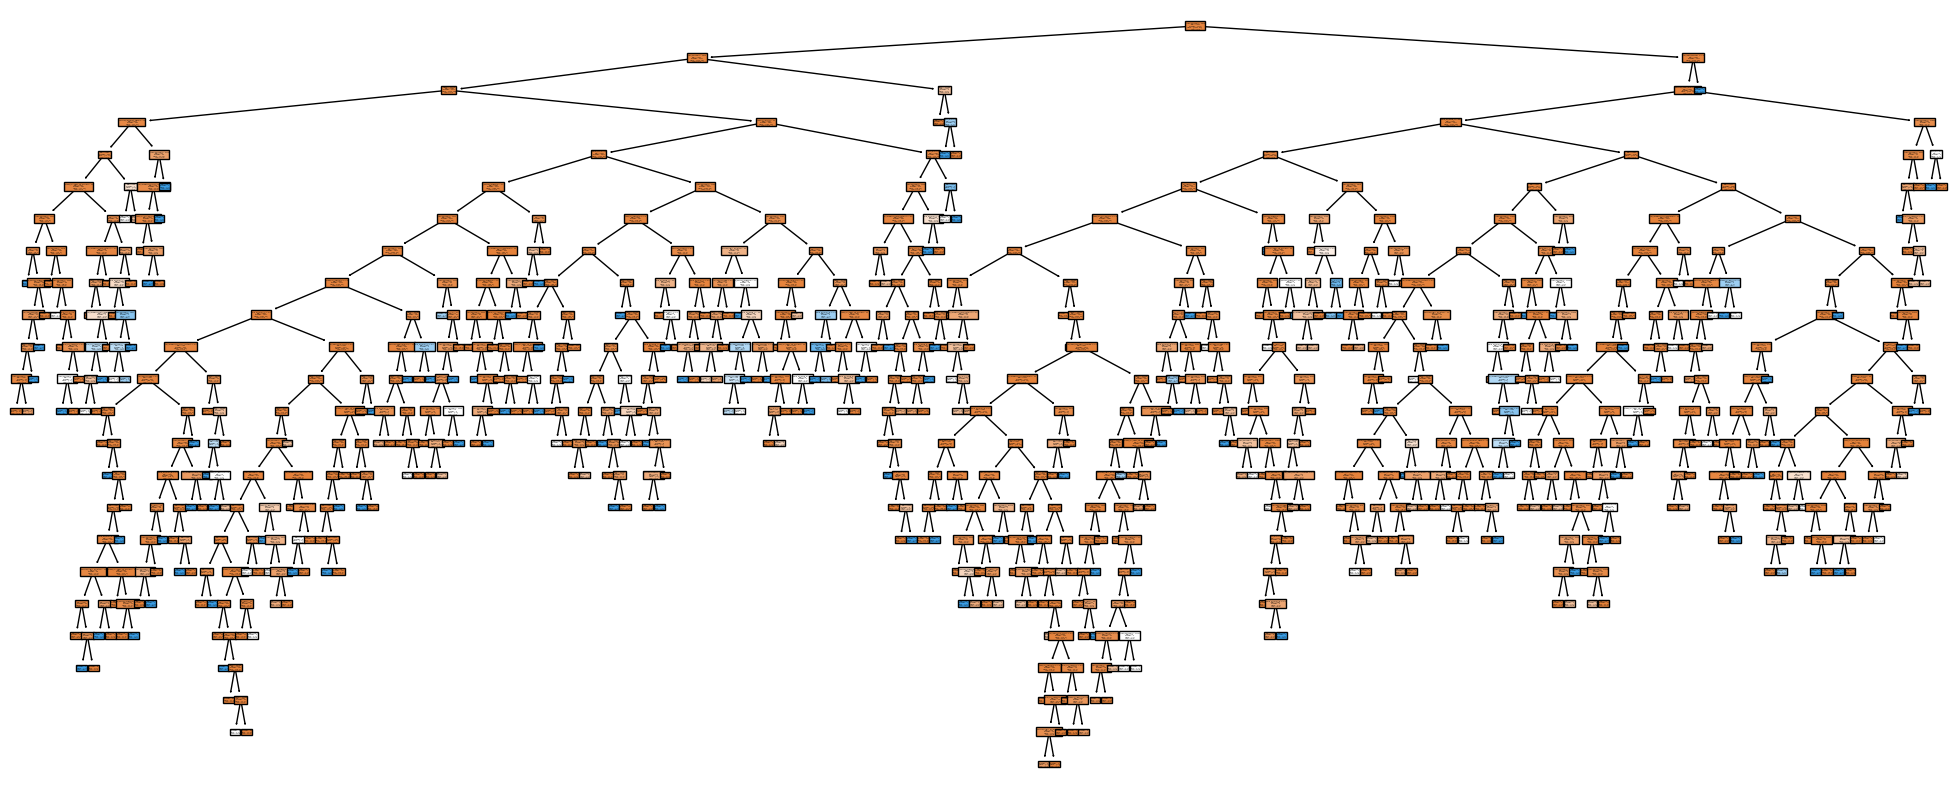

In [235]:
plt.figure(figsize = (25 ,10))
plot_tree(clf,
          filled = True,
          class_names = ['Bom', 'Mau'],
          feature_names = x_train.columns);

C:\Users\ncali\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


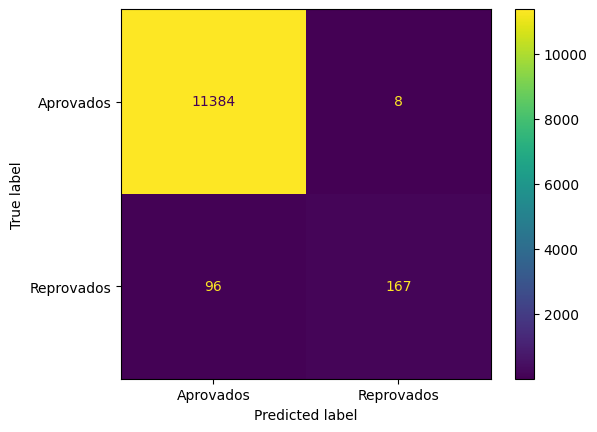

In [236]:
plot_confusion_matrix(clf, x_train, y_train, display_labels = ['Aprovados', 'Reprovados']);

In [237]:
predict_train = clf.predict(x_train)

In [238]:
accuracy_score(y_train, predict_train)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [239]:
clf = clf.fit(x_test, y_test)


C:\Users\ncali\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


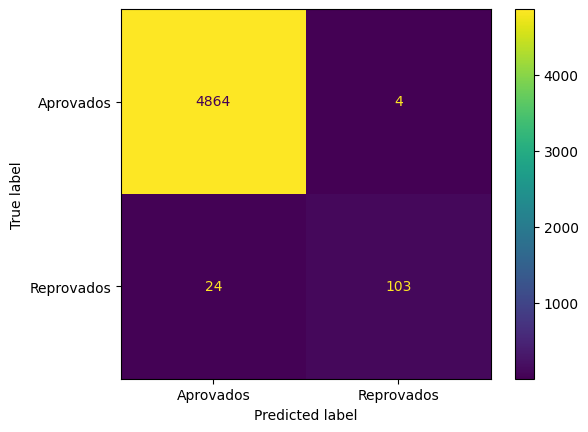

In [240]:
plot_confusion_matrix(clf, x_test, y_test, display_labels = ["Aprovados", "Reprovados"])

In [241]:
y_chapeu_teste = clf.predict(x_test)
y_chapeu_teste

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [242]:
y_chapeu_teste = clf.predict(x_test)


In [243]:
accuracy_score(y_teste, y_chapeu_teste) #Acurácia da base de teste

0.9269269269269269

In [244]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf = 5, random_state=123)
clf = clf.fit(x_train,y_train)

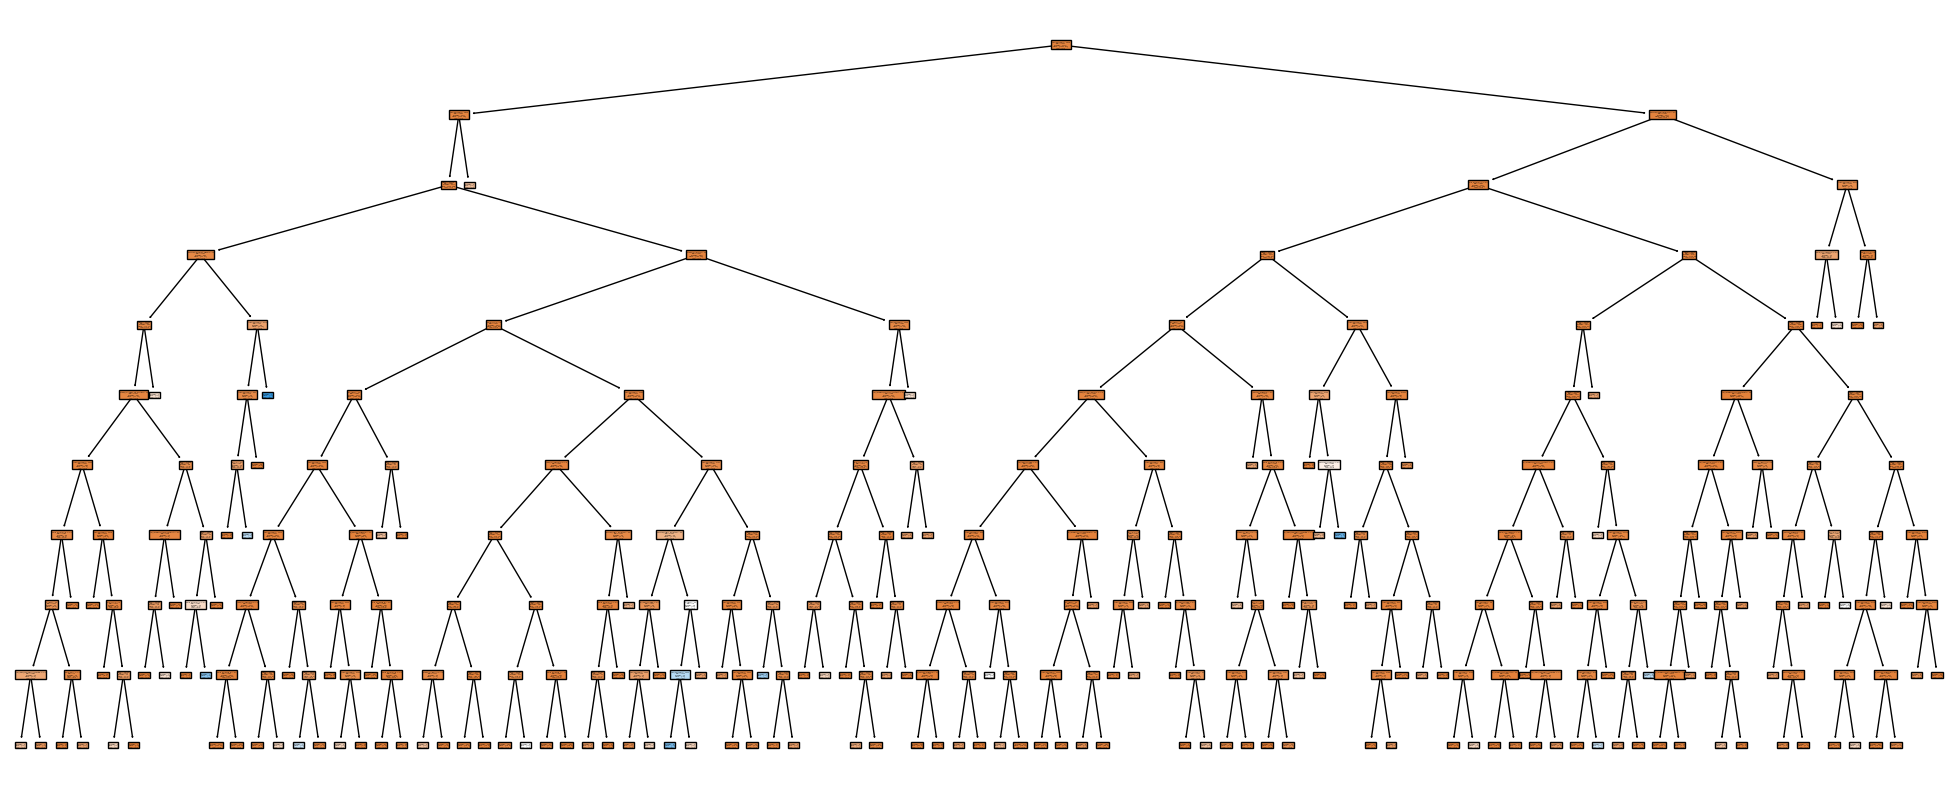

In [245]:
plt.figure(figsize = (25 ,10))
plot_tree(clf,
          filled = True,
          class_names = ['Bom', 'Mau'],
          feature_names = x_train.columns);

C:\Users\ncali\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


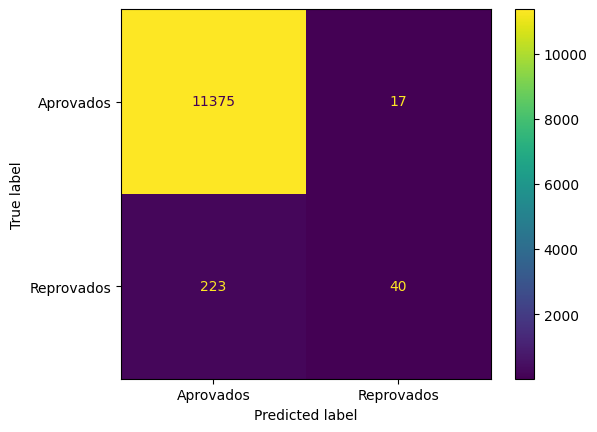

In [246]:
plot_confusion_matrix(clf, x_train, y_train, display_labels = ["Aprovados", "Reprovados"])

Se todos os contratos fossem classificados como bons, a acurácia seria de 100%.